In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
coordinates[:10]

[(47.12265847190645, -172.47375239889584),
 (25.45645304010847, -175.81434885921954),
 (-3.3633485268128993, -11.448741671845028),
 (78.23819845462515, 134.8848992177857),
 (-44.939411292932014, 144.06395647669245),
 (73.59518689997122, 156.63392669869972),
 (-61.90296931128138, -46.14586696735873),
 (-50.84731106891996, -74.22766996346873),
 (-33.44952087979528, 107.47583660094045),
 (-83.1079725868312, -108.18149938780851)]

In [8]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [9]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

provideniya ru
kapaa us
georgetown sh
nizhneyansk ru
new norfolk au
cherskiy ru
ushuaia ar
punta arenas cl
busselton au
punta arenas cl
warqla dz
burkhala ru
bethel us
wajir ke
avarua ck
ponta do sol cv
rikitea pf
faanui pf
marcona pe
punta arenas cl
bredasdorp za
bereda so
rikitea pf
aitape pg
puerto ayora ec
ayagoz kz
flinders au
vaini to
krutinka ru
souris ca
bluff nz
bluff nz
tiksi ru
rikitea pf
busselton au
jamestown sh
pandan ph
galgani sd
excelsior springs us
gulshat kz
souillac mu
belushya guba ru
iqaluit ca
prince rupert ca
vila franca do campo pt
gairo tz
cayenne gf
boundiali ci
vila franca do campo pt
sistranda no
kangaatsiaq gl
qaanaaq gl
thinadhoo mv
esperance au
east london za
copiapo cl
zabol ir
rikitea pf
lincoln us
bonavista ca
pingxiang cn
punta arenas cl
yishui cn
port macquarie au
clyde river ca
thompson ca
bethel us
tuktoyaktuk ca
albany au
los llanos de aridane es
ushuaia ar
yulara au
rikitea pf
aleksandrov gay ru
bluff nz
lagoa pt
punta arenas cl
fukue jp
busselt

ushuaia ar
faanui pf
avarua ck
nome us
taolanaro mg
mar del plata ar
punta arenas cl
georgetown sh
dikson ru
punta arenas cl
antas pt
pevek ru
lhokseumawe id
christchurch nz
luderitz na
mataura pf
tasiilaq gl
kisangani cd
severo-kurilsk ru
katherine au
punta arenas cl
new norfolk au
pangoa pe
novobelokatay ru
east london za
torbay ca
hermanus za
ejido ve
cape town za
chokurdakh ru
bethel us
ushuaia ar
qaanaaq gl
canmore ca
jamestown sh
cherskiy ru
vaini to
chumikan ru
hasaki jp
new norfolk au
hithadhoo mv
mataura pf
cidreira br
busselton au
grand gaube mu
mahebourg mu
sola vu
ushuaia ar
aklavik ca
new norfolk au
castro cl
ushuaia ar
mys shmidta ru
attawapiskat ca
punta arenas cl
saldanha za
airai pw
port alfred za
hermanus za
albany au
ushuaia ar
mahebourg mu
tiksi ru
sobolevo ru
cumaribo co
yambio sd
ushuaia ar
gorkovskoye ru
arraial do cabo br
busselton au
chokurdakh ru
bredasdorp za
cayenne gf
tecoanapa mx
leningradskiy ru
vaini to
mataura pf
barrow us
barentsburg sj
ushuaia ar
sale

tsihombe mg
port elizabeth za
gorin ru
doctor arroyo mx
balkanabat tm
rikitea pf
lakhdenpokhya ru
albany au


In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
# Starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | provideniya
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | cherskiy
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | warqla
City not found. Skipping...
Processing Record 11 of Set 1 | burkhala
City not found. Skipping...
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | wajir
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | ponta do sol
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | faanui
Processing Record 18 of Set 1 | marcona
City not found. Skipping...
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | bereda
Processing Rec

City not found. Skipping...
Processing Record 35 of Set 4 | seoul
Processing Record 36 of Set 4 | san ramon
Processing Record 37 of Set 4 | wanning
Processing Record 38 of Set 4 | poli
Processing Record 39 of Set 4 | portland
Processing Record 40 of Set 4 | chuy
Processing Record 41 of Set 4 | hokitika
Processing Record 42 of Set 4 | acajutla
Processing Record 43 of Set 4 | minna
Processing Record 44 of Set 4 | san patricio
Processing Record 45 of Set 4 | saint-francois
Processing Record 46 of Set 4 | richards bay
Processing Record 47 of Set 4 | tual
Processing Record 48 of Set 4 | nouadhibou
Processing Record 49 of Set 4 | hornepayne
Processing Record 50 of Set 4 | olafsvik
Processing Record 1 of Set 5 | saint anthony
Processing Record 2 of Set 5 | namatanai
Processing Record 3 of Set 5 | jaque
Processing Record 4 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 5 of Set 5 | yirol
City not found. Skipping...
Processing Record 6 of Set 5 | arraial do cabo
Processing Rec

Processing Record 25 of Set 8 | bathsheba
Processing Record 26 of Set 8 | onega
Processing Record 27 of Set 8 | pudozh
Processing Record 28 of Set 8 | san quintin
Processing Record 29 of Set 8 | san cristobal
Processing Record 30 of Set 8 | robe
Processing Record 31 of Set 8 | xambioa
Processing Record 32 of Set 8 | geraldton
Processing Record 33 of Set 8 | tigil
Processing Record 34 of Set 8 | viedma
Processing Record 35 of Set 8 | yangambi
Processing Record 36 of Set 8 | antas
Processing Record 37 of Set 8 | lhokseumawe
Processing Record 38 of Set 8 | christchurch
Processing Record 39 of Set 8 | kisangani
Processing Record 40 of Set 8 | severo-kurilsk
Processing Record 41 of Set 8 | katherine
Processing Record 42 of Set 8 | novobelokatay
Processing Record 43 of Set 8 | ejido
Processing Record 44 of Set 8 | canmore
Processing Record 45 of Set 8 | chumikan
Processing Record 46 of Set 8 | grand gaube
Processing Record 47 of Set 8 | cumaribo
City not found. Skipping...
Processing Record 

City not found. Skipping...
Processing Record 13 of Set 12 | berezovyy
Processing Record 14 of Set 12 | pochutla
Processing Record 15 of Set 12 | wairoa
Processing Record 16 of Set 12 | rovnoye
Processing Record 17 of Set 12 | hajnowka
Processing Record 18 of Set 12 | arlit
Processing Record 19 of Set 12 | lavumisa
Processing Record 20 of Set 12 | saint george
Processing Record 21 of Set 12 | bairiki
Processing Record 22 of Set 12 | mufulira
Processing Record 23 of Set 12 | dingle
Processing Record 24 of Set 12 | kudahuvadhoo
Processing Record 25 of Set 12 | sao miguel do araguaia
Processing Record 26 of Set 12 | solnechnyy
Processing Record 27 of Set 12 | polovragi
Processing Record 28 of Set 12 | champerico
Processing Record 29 of Set 12 | kindersley
Processing Record 30 of Set 12 | jega
Processing Record 31 of Set 12 | ayan
Processing Record 32 of Set 12 | mitu
Processing Record 33 of Set 12 | ust-kuyga
Processing Record 34 of Set 12 | bengkalis
City not found. Skipping...
Processin

In [14]:
len(city_data)

542

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Provideniya,64.38,-173.30,49.68,92,96,4.32,RU,2020-08-23 15:08:22
1,Kapaa,22.08,-159.32,78.80,88,90,9.17,US,2020-08-23 15:08:22
2,Georgetown,5.41,100.34,84.20,88,40,5.82,MY,2020-08-23 15:04:32
3,New Norfolk,-42.78,147.06,41.00,85,7,1.01,AU,2020-08-23 15:08:23
4,Cherskiy,68.75,161.30,38.03,94,100,16.28,RU,2020-08-23 15:08:24
5,Ushuaia,-54.80,-68.30,35.60,80,20,10.29,AR,2020-08-23 15:04:19
6,Punta Arenas,-53.15,-70.92,35.60,69,40,19.46,CL,2020-08-23 15:08:25
7,Busselton,-33.65,115.33,46.99,76,1,5.82,AU,2020-08-23 15:08:25
8,Bethel,41.37,-73.41,82.99,69,1,3.96,US,2020-08-23 15:08:26
9,Wajir,1.75,40.06,89.60,43,75,8.05,KE,2020-08-23 15:08:27


In [17]:
# Reorder DataFrame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Provideniya,RU,2020-08-23 15:08:22,64.38,-173.30,49.68,92,96,4.32
1,Kapaa,US,2020-08-23 15:08:22,22.08,-159.32,78.80,88,90,9.17
2,Georgetown,MY,2020-08-23 15:04:32,5.41,100.34,84.20,88,40,5.82
3,New Norfolk,AU,2020-08-23 15:08:23,-42.78,147.06,41.00,85,7,1.01
4,Cherskiy,RU,2020-08-23 15:08:24,68.75,161.30,38.03,94,100,16.28
5,Ushuaia,AR,2020-08-23 15:04:19,-54.80,-68.30,35.60,80,20,10.29
6,Punta Arenas,CL,2020-08-23 15:08:25,-53.15,-70.92,35.60,69,40,19.46
7,Busselton,AU,2020-08-23 15:08:25,-33.65,115.33,46.99,76,1,5.82
8,Bethel,US,2020-08-23 15:08:26,41.37,-73.41,82.99,69,1,3.96
9,Wajir,KE,2020-08-23 15:08:27,1.75,40.06,89.60,43,75,8.05


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Get Data for Plotting

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

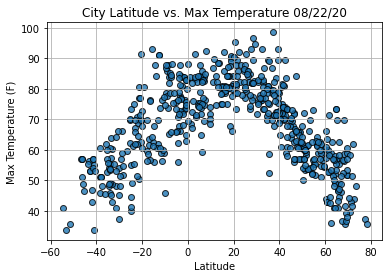

In [16]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

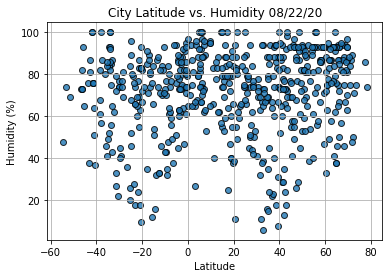

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

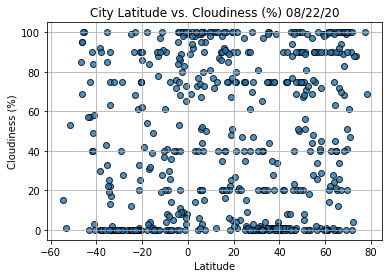

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

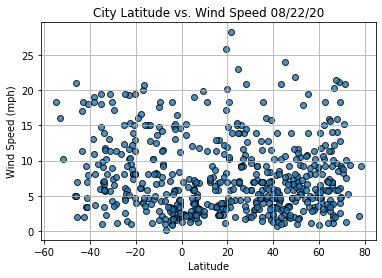

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [41]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [42]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

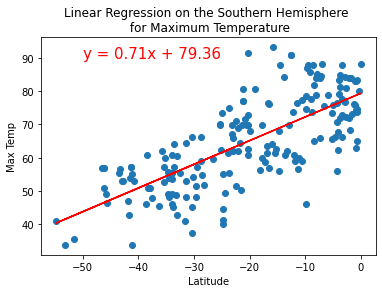

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

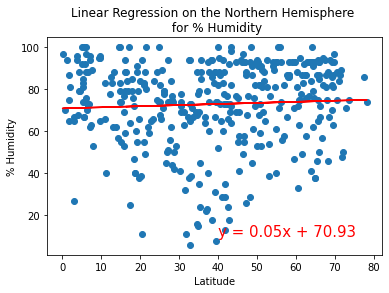

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

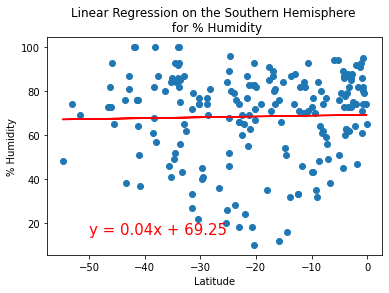

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

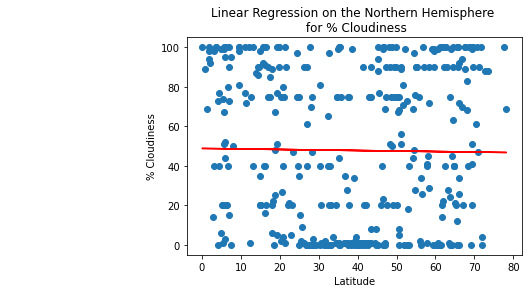

In [67]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

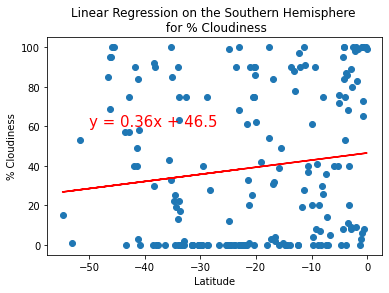

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

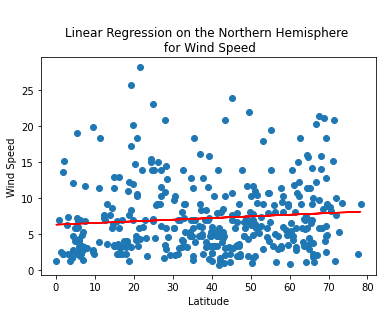

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

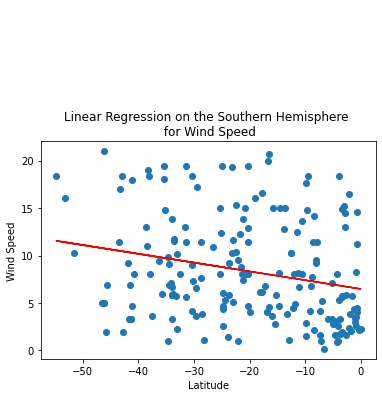

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))